# SENTIMENT ANALYSIS
### Dataset Information
The main goal of this project is to identify speech containing hate speech in tweets. To simplify the classification process, we consider a tweet to contain hate speech if it expresses racist or sexist sentiments. Consequently, the task involves categorizing tweets into two groups: those containing hate speech (labeled as 1) and those that do not (labeled as 0).

Formally, the objective is to create a model that can predict the labels for the test dataset based on a training sample of tweets and their corresponding labels. In the training dataset, each tweet is associated with a label, where label 1 signifies the presence of hate speech and label 0 indicates the absence of hate speech.

The training dataset comprises 12,488 tweets and their respective labels. This data is available in CSV format, with each line of the file containing a tweet ID, its corresponding label, and the content of the tweet.

The ultimate aim is to develop a robust classification model that can accurately distinguish between tweets that contain hate speech and those that do not, enabling the detection and handling of potentially harmful content on social media platforms.


In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: pink;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## IMPORT NECESSARY LIBRARIES

In [2]:
# DataFrame
import pandas as pd
import numpy as np
import seaborn as sns 

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score


# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec


# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Read in data
df = pd.read_csv('Twitter_Data.csv')
df['id']= range(1,len(df)+1)
new_twitter_csv = 'new_twitter_dataset.csv'
df.to_csv(new_twitter_csv,index=False)
df.head(5)
print(df['category'][0])

-1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
 2   id          162980 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ MB


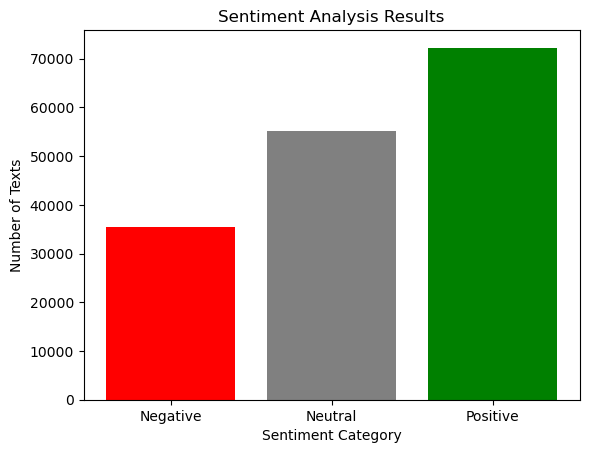

In [4]:
#Bar chart for the training data. From the bar chart below we see that the data is biased towards the positive comments.
categories = [df['category'][0], df['category'][1],df['category'][2]]
category_labels = ['Negative', 'Neutral', 'Positive']
category_counts = df['category'].value_counts().sort_index()
df.drop_duplicates()
df.info()
# Create a bar chart
plt.bar(categories, category_counts, tick_label=category_labels, color=['red', 'gray', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Texts')
plt.title('Sentiment Analysis Results')
plt.show()

In [5]:
# Drop missing values
df.dropna(how='any', inplace=True)

# Verify the DataFrame contents and index
print(df.head())

# Accessing the 6th row of 'tweet' column
index_to_access = 5  # This is the index, not the row number
if index_to_access < len(df):
    example = df['clean_text'].iloc[index_to_access]  # Using iloc to access by index
    tokens = nltk.word_tokenize(example)
    print(tokens[:5])
else:
    print("Index out of range.")

                                          clean_text  category  id
0  when modi promised “minimum government maximum...      -1.0   1
1  talk all the nonsense and continue all the dra...       0.0   2
2  what did just say vote for modi  welcome bjp t...       1.0   3
3  asking his supporters prefix chowkidar their n...       1.0   4
4  answer who among these the most powerful world...       1.0   5
['kiya', 'tho', 'refresh', 'maarkefir', 'comment']


In [6]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
tagged = nltk.pos_tag(tokens)
tagged[:5]
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S kiya/NN tho/NN refresh/JJ maarkefir/JJ comment/NN karo/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## VADER MODEL 

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It was developed by C.J. Hutto and Eric Gilbert to handle the nuances and specific language patterns found in social media content, including emojis, slang, and informal language. It assesses polarity (positive, negative, or neutral) and intensity using a lexicon of words with sentiment scores. It takes into account emojis, slang, and modifiers, and computes sentiment by combining word scores while allowing for valence shifters. VADER categorises sentiment as positive, negative, or neutral and assigns an intensity level ranging from -1 to 1. It is useful for analysing informal content such as social media, but it may struggle in formal or sophisticated environments.  VADER employs a lexicon of words and the sentiment scores associated with them. Each word in the lexicon receives a polarity (positive or negative) and an intensity (strong of sentiment) value. The lexicon also takes into account various forms of a word, capitalization, and modifiers (e.g., "very" or "extremely") to adjust the sentiment intensity.

### STEP 1:
### VADER Sentiment Scoring
I will use the nltk's SentimentIntensityAnalyzer to get the sentiment score of aech text wether its pos, neg or neutral. This approach uses bag of words and the first step will be to remove the stop words which doesnt really give a sentiment value to the text and secondly, i will score each word and combine to a total score.
 

In [7]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patty\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/162969 [00:00<?, ?it/s]

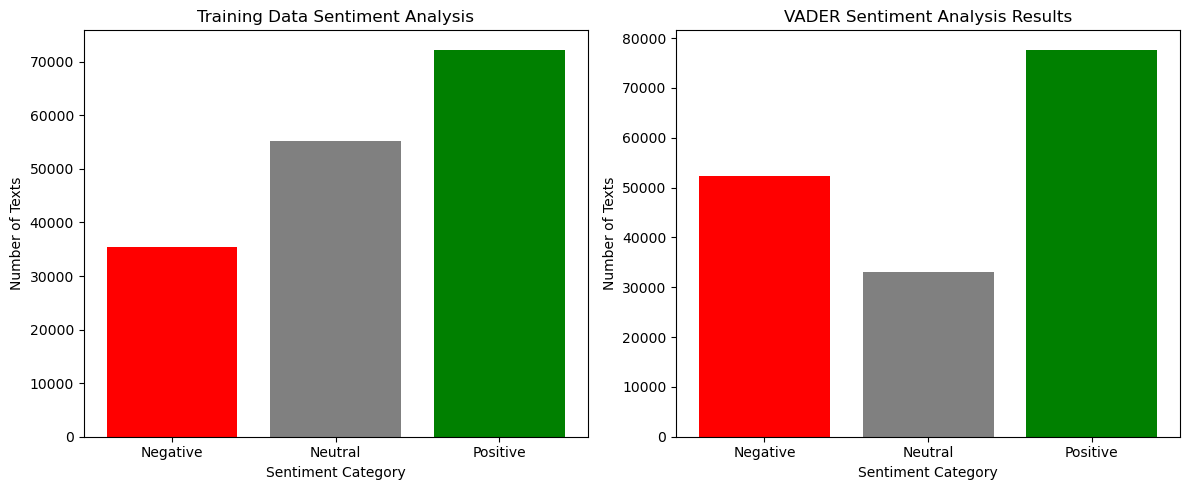

In [11]:

# Define categories and labels
categories = [-1, 0, 1]
category_labels = ['Negative', 'Neutral', 'Positive']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Subplot 1: Bar chart for the training data
category_counts_train = df['category'].value_counts().sort_index()
axs[0].bar(categories, category_counts_train, tick_label=category_labels, color=['red', 'gray', 'green'])
axs[0].set_xlabel('Sentiment Category')
axs[0].set_ylabel('Number of Texts')
axs[0].set_title('Training Data Sentiment Analysis')

# Subplot 2: Vader Sentiment Analysis Results
sentiments = []
for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1]['clean_text']
    sentiment = sia.polarity_scores(text)
    sentiments.append(sentiment['compound'])

# Convert sentiments to sentiment labels based on threshold
threshold = 0.05  # Adjust this threshold as needed
predicted_categories = []
for sentiment in sentiments:
    if sentiment < -threshold:
        predicted_categories.append(-1)  # Negative
    elif sentiment > threshold:
        predicted_categories.append(1)   # Positive
    else:
        predicted_categories.append(0)   # Neutral


axs[1].bar(categories, category_counts_vader, tick_label=category_labels, color=['red', 'gray', 'green'])
axs[1].set_xlabel('Sentiment Category')
axs[1].set_ylabel('Number of Texts')
axs[1].set_title('VADER Sentiment Analysis Results')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [12]:
#Storing the vader results as a csv
vaders= pd.DataFrame(sentiments).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df,how= 'left', on = 'id')
vaders_data = vaders.to_csv('vaders_data_outcome')

In [13]:
# Get the actual categories from the DataFrame
actual_categories = df['category']

# Compare predicted categories with actual categories and calculate accuracy
correct_predictions = sum(predicted == actual for predicted, actual in zip(predicted_categories, actual_categories))
total_predictions = len(df)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print("Accuracy Percentage:", accuracy_percentage)

Accuracy Percentage: 56.796077781664


## Summary: Twitter Reviews Sentiment Data Analysis using VADER
In this analysis, we employed the VADER sentiment analysis tool to evaluate the sentiment expressed in a collection of Twitter reviews. The goal was to categorize the sentiments of these reviews as either negative, neutral, or positive.
After preprocessing the Twitter reviews by cleaning the text and extracting relevant features, we ran the VADER sentiment analysis on each review. The VADER tool produced compound scores ranging from -1 (most negative) to 1 (most positive), which we used to categorize the sentiments into the three predefined categories.Our analysis yielded an **accuracy percentage of 56.80%** when comparing the predicted sentiment labels by VADER against the actual sentiment labels from the data.

Interpreting the accuracy percentage in light of the task and dataset is crucial. The comparatively moderate accuracy indicates that, despite VADER's success in identifying sentiment patterns in Twitter reviews, there are difficulties in separating subtle feelings, sarcasm, or context-dependent meanings, which are frequently present in social media writing.I will go on and consider using a more advanced sentiment analysis methods, like machine learning models or deep learning strategies, to get even higher accuracy. 


In [14]:
rivers = [
    {"name": "Nile", "length": 4157},
    {"name": "Yangtze", "length": 3434},
    {"name": "Murray-Darling", "length": 2310},
    {"name": "Volga", "length": 2290},
    {"name": "Mississippi", "length": 2540},
    {"name": "Amazon", "length": 3915}
]

# Task 1: Printing out each river's name
print("Task 1:")
for river in rivers:
    print(river["name"])

# Task 2: Add up and print out the total length o,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,rivers
total_length = 0
for river in rivers:
    total_length += river["length"]
print("\nTask 2:")
print("Total length of all rivers:", total_length, "miles")

# Extension 1: Print out river names that begin with the letter "M"
print("\nExtension 1:")
for river in rivers:
    if river["name"].startswith("M"):
        print(river["name"])

# Extension 2: Convert and print river lengths from miles to kilometers
print("\nExtension 2:")
conversion_factor = 1.6  # 1 mile is roughly 1.6 kilometers
for river in rivers:
    length_km = river["length"] * conversion_factor
    print(f"{river['name']} - {length_km:.2f} km")


Task 1:
Nile
Yangtze
Murray-Darling
Volga
Mississippi
Amazon

Task 2:
Total length of all rivers: 18646 miles

Extension 1:
Murray-Darling
Mississippi

Extension 2:
Nile - 6651.20 km
Yangtze - 5494.40 km
Murray-Darling - 3696.00 km
Volga - 3664.00 km
Mississippi - 4064.00 km
Amazon - 6264.00 km
